***Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

***Loading Dataset***

In [2]:
data = pd.read_csv('yield_prediction\\yield_prediction_dataset.csv')
data.head()

,field_id,date_of_image,latitude,longitude,NDVI,GNDVI,NDWI,SAVI,soil_moisture,temperature,rainfall,crop_type,yield,Unnamed: 13,Unnamed: 14
0,Field_1,2023-01-01,22.625231,88.497925,0.060190,0.084801,-0.084801,0.090280,46.119353,9.884229,1.662354,Rice,40.218031,NaN,NaN
1,Field_1,2023-01-16,22.625231,88.497925,0.213957,0.222009,-0.222009,0.320896,37.542525,13.967073,8.446302,Rice,30.870338,NaN,NaN
2,Field_1,2023-01-31,22.625231,88.497925,0.403306,0.431204,-0.431204,0.604837,24.926279,13.590147,3.862833,Rice,45.330050,NaN,NaN
3,Field_1,2023-02-15,22.625231,88.497925,0.418187,0.444132,-0.444132,0.627144,24.114157,12.343355,16.623542,Rice,49.711781,NaN,NaN
4,Field_1,2023-02-03,22.625231,88.497925,0.375138,0.387985,-0.387985,0.562591,27.420927,11.007707,9.496210,Rice,34.542646,NaN,NaN


In [3]:
# Dropping Unwanted Columns
data = data.drop(['field_id','date_of_image','Unnamed: 13','Unnamed: 14'],axis=1)
data.head()

,latitude,longitude,NDVI,GNDVI,NDWI,SAVI,soil_moisture,temperature,rainfall,crop_type,yield
0,22.625231,88.497925,0.060190,0.084801,-0.084801,0.090280,46.119353,9.884229,1.662354,Rice,40.218031
1,22.625231,88.497925,0.213957,0.222009,-0.222009,0.320896,37.542525,13.967073,8.446302,Rice,30.870338
2,22.625231,88.497925,0.403306,0.431204,-0.431204,0.604837,24.926279,13.590147,3.862833,Rice,45.330050
3,22.625231,88.497925,0.418187,0.444132,-0.444132,0.627144,24.114157,12.343355,16.623542,Rice,49.711781
4,22.625231,88.497925,0.375138,0.387985,-0.387985,0.562591,27.420927,11.007707,9.496210,Rice,34.542646


In [4]:
# Feature Engineering
data["NDVI_temp"] = data["NDVI"] * data["temperature"]
data["NDVI_rainfall"] = data["NDVI"] * data["rainfall"]
data["SAVI_soil_moisture"] = data["SAVI"] * data["soil_moisture"]

In [5]:
data.head()

,latitude,longitude,NDVI,GNDVI,NDWI,SAVI,soil_moisture,temperature,rainfall,crop_type,yield,NDVI_temp,NDVI_rainfall,SAVI_soil_moisture
0,22.625231,88.497925,0.060190,0.084801,-0.084801,0.090280,46.119353,9.884229,1.662354,Rice,40.218031,0.594931,0.100057,4.163635
1,22.625231,88.497925,0.213957,0.222009,-0.222009,0.320896,37.542525,13.967073,8.446302,Rice,30.870338,2.988355,1.807147,12.047228
2,22.625231,88.497925,0.403306,0.431204,-0.431204,0.604837,24.926279,13.590147,3.862833,Rice,45.330050,5.480993,1.557905,15.076337
3,22.625231,88.497925,0.418187,0.444132,-0.444132,0.627144,24.114157,12.343355,16.623542,Rice,49.711781,5.161825,6.951741,15.123042
4,22.625231,88.497925,0.375138,0.387985,-0.387985,0.562591,27.420927,11.007707,9.496210,Rice,34.542646,4.129405,3.562386,15.426760


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            1625 non-null   float64
 1   longitude           1625 non-null   float64
 2   NDVI                1625 non-null   float64
 3   GNDVI               1625 non-null   float64
 4   NDWI                1625 non-null   float64
 5   SAVI                1625 non-null   float64
 6   soil_moisture       1625 non-null   float64
 7   temperature         1625 non-null   float64
 8   rainfall            1625 non-null   float64
 9   crop_type           1625 non-null   object 
 10  yield               1625 non-null   float64
 11  NDVI_temp           1625 non-null   float64
 12  NDVI_rainfall       1625 non-null   float64
 13  SAVI_soil_moisture  1625 non-null   float64
dtypes: float64(13), object(1)
memory usage: 177.9+ KB


In [7]:
data.isnull().sum()

latitude              0
longitude             0
NDVI                  0
GNDVI                 0
NDWI                  0
SAVI                  0
soil_moisture         0
temperature           0
rainfall              0
crop_type             0
yield                 0
NDVI_temp             0
NDVI_rainfall         0
SAVI_soil_moisture    0
dtype: int64

In [8]:
data.duplicated().sum()

0

***Performing Exploratory Data Analysis (EDA)***

In [9]:
sns.set_style("whitegrid")

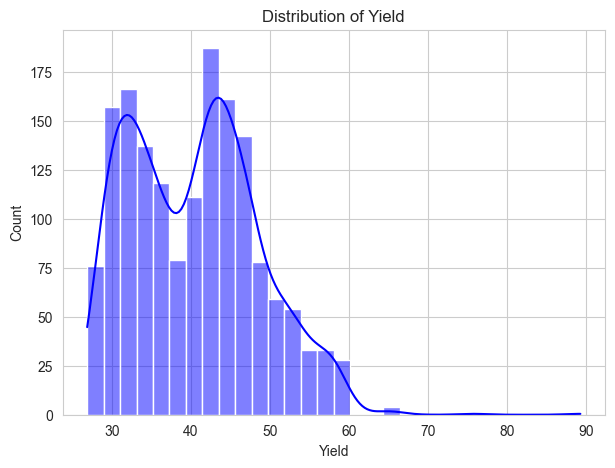

In [10]:
plt.figure(figsize=(7, 5))
sns.histplot(data["yield"], bins=30, kde=True, color="blue")
plt.xlabel("Yield")
plt.title("Distribution of Yield")
plt.show()

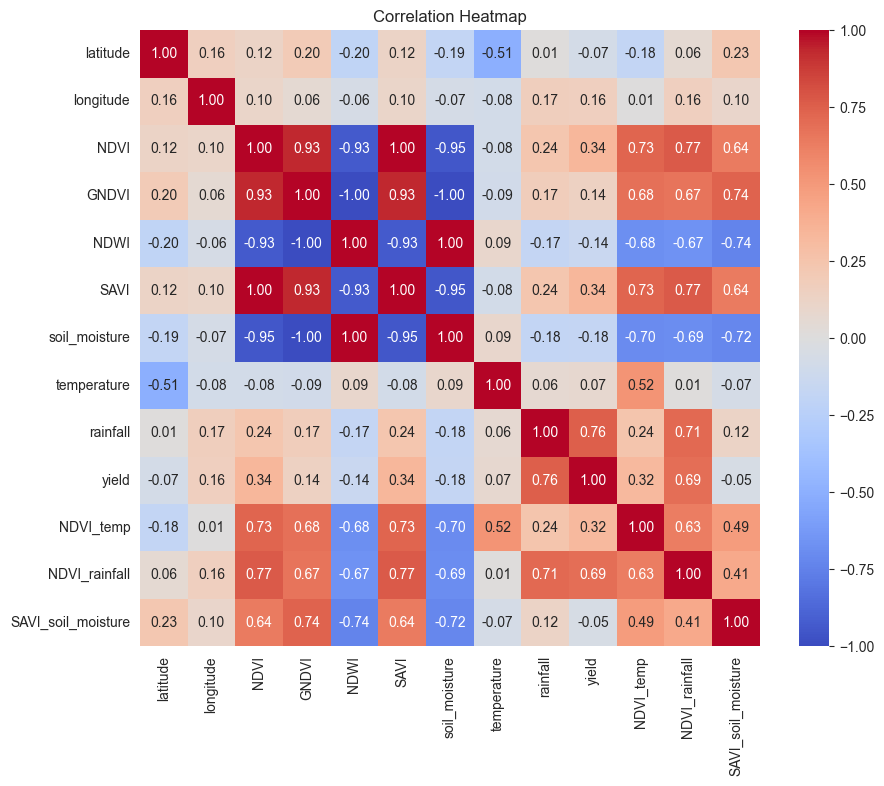

In [11]:
plt.figure(figsize=(10, 8))
corr_matrix = data.select_dtypes(include=["float64"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

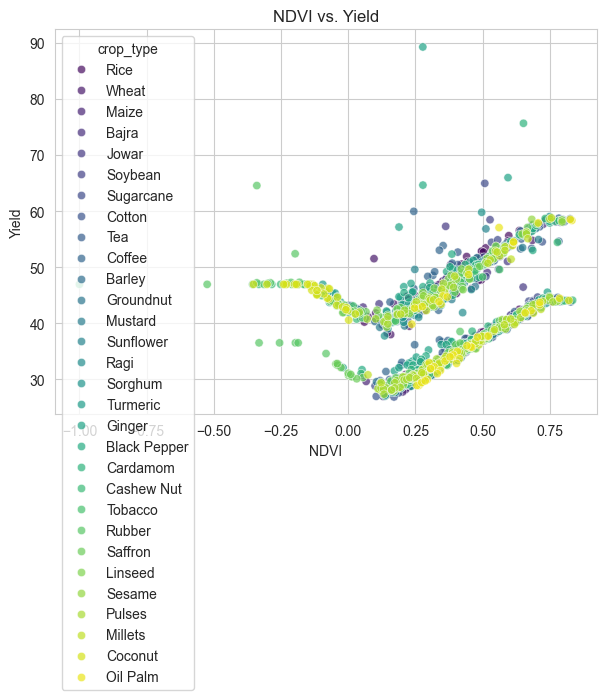

In [12]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x="NDVI", y="yield", hue="crop_type", palette="viridis", alpha=0.7)
plt.xlabel("NDVI")
plt.ylabel("Yield")
plt.title("NDVI vs. Yield")
plt.show()

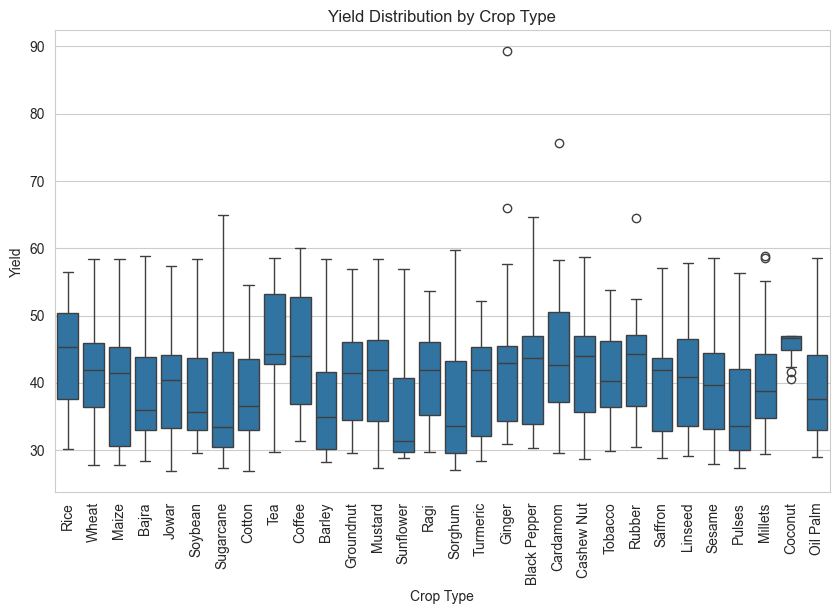

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="crop_type", y="yield")
plt.xlabel("Crop Type")
plt.ylabel("Yield")
plt.title("Yield Distribution by Crop Type")
plt.xticks(rotation=90)
plt.show()

In [14]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

Outliers detected in yield: 3
Outliers detected in NDVI: 33
Outliers detected in GNDVI: 104
Outliers detected in NDWI: 104
Outliers detected in SAVI: 33
Outliers detected in soil_moisture: 89
Outliers detected in temperature: 0
Outliers detected in rainfall: 15
Outliers detected in NDVI_temp: 65
Outliers detected in NDVI_rainfall: 47
Outliers detected in SAVI_soil_moisture: 141


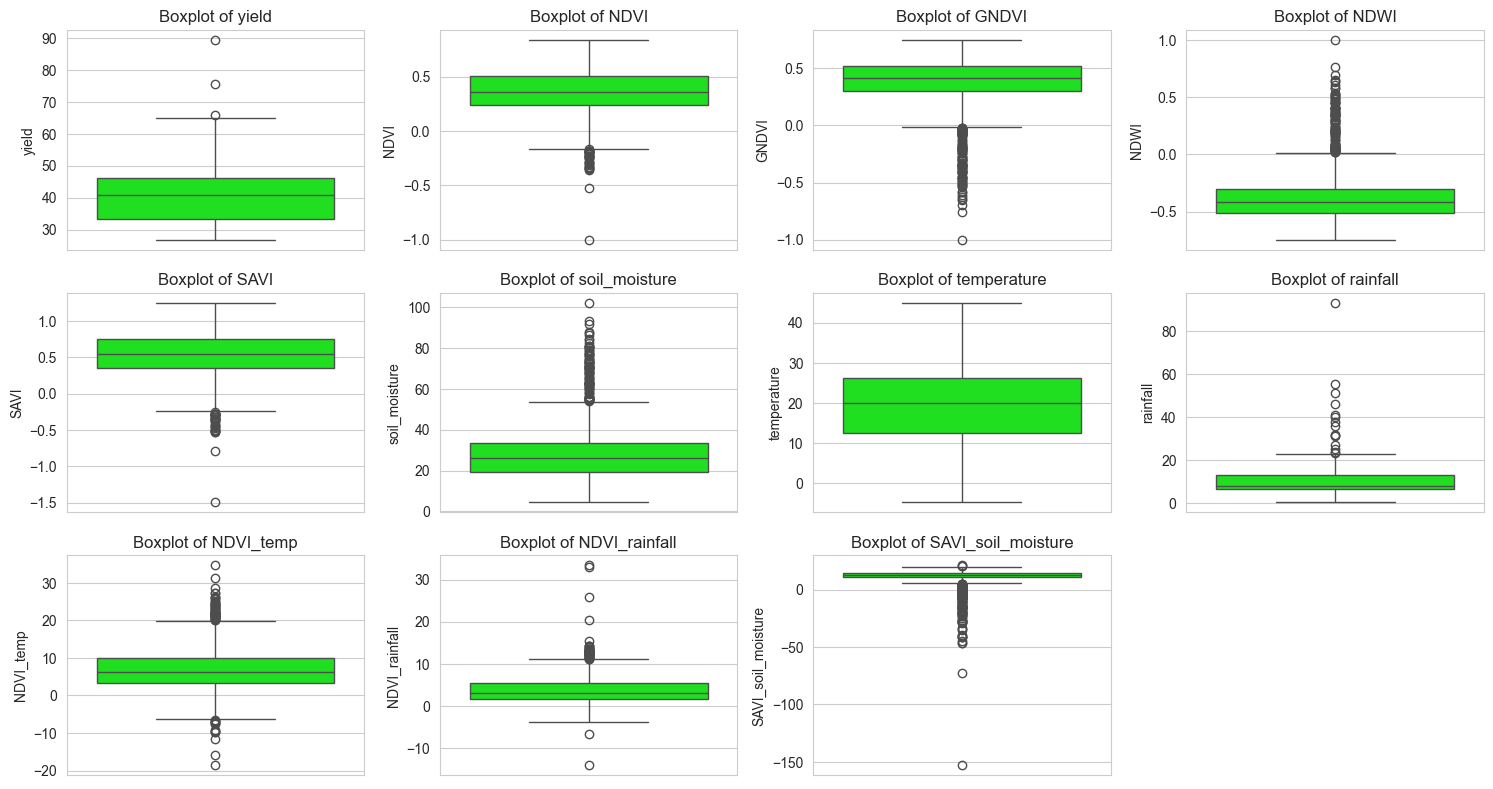

In [15]:
plt.figure(figsize=(15,8))

for i,col in enumerate (["yield", "NDVI", "GNDVI", "NDWI", "SAVI", "soil_moisture", "temperature", "rainfall","NDVI_temp","NDVI_rainfall","SAVI_soil_moisture"]):
    
    outliers = detect_outliers(data, col)
    print(f"Outliers detected in {col}: {len(outliers)}")
    
    plt.subplot(3,4,i+1)    
    sns.boxplot(y=data[col],color='lime')
    plt.title(f"Boxplot of {col}")
    plt.xlabel('')
    plt.ylabel(col)    

plt.tight_layout()
plt.show()

In [16]:
# Handle Outliers
# IQR Method to identify and cap Outliers
def cap_outliers(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)


for col in ["yield", "NDVI", "GNDVI", "NDWI", "SAVI", "soil_moisture", "temperature", "rainfall","NDVI_temp","NDVI_rainfall","SAVI_soil_moisture"]:
    cap_outliers(data, col) 

Outliers detected in yield: 0
Outliers detected in NDVI: 0
Outliers detected in GNDVI: 0
Outliers detected in NDWI: 0
Outliers detected in SAVI: 0
Outliers detected in soil_moisture: 0
Outliers detected in temperature: 0
Outliers detected in rainfall: 0
Outliers detected in NDVI_temp: 0
Outliers detected in NDVI_rainfall: 0
Outliers detected in SAVI_soil_moisture: 0


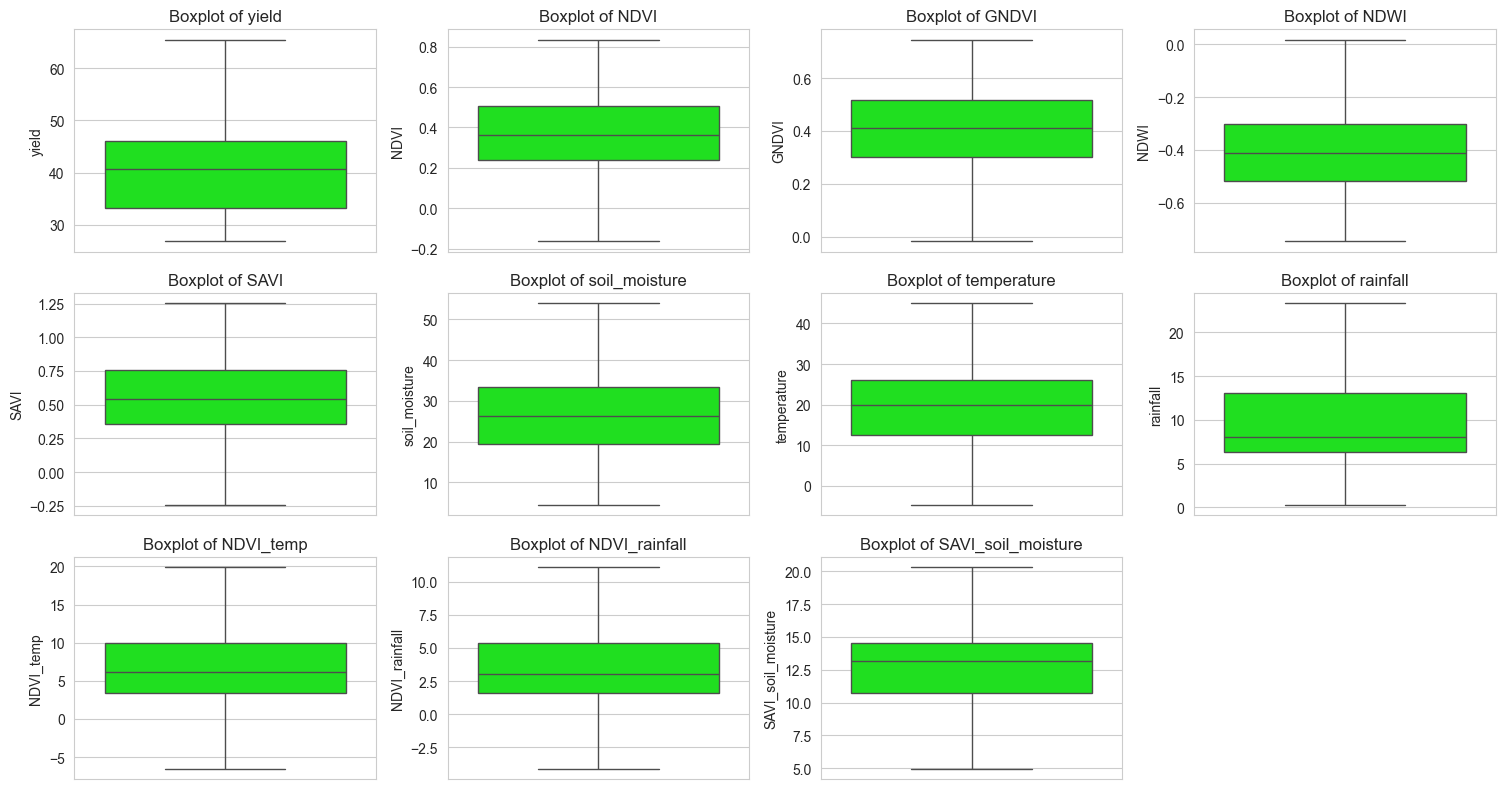

In [17]:
plt.figure(figsize=(15,8))

for i,col in enumerate (["yield", "NDVI", "GNDVI", "NDWI", "SAVI", "soil_moisture", "temperature", "rainfall","NDVI_temp","NDVI_rainfall","SAVI_soil_moisture"]):
    
    outliers = detect_outliers(data, col)
    print(f"Outliers detected in {col}: {len(outliers)}")
    
    plt.subplot(3,4,i+1)    
    sns.boxplot(y=data[col],color='lime')
    plt.title(f"Boxplot of {col}")
    plt.xlabel('')
    plt.ylabel(col)    

plt.tight_layout()
plt.show()

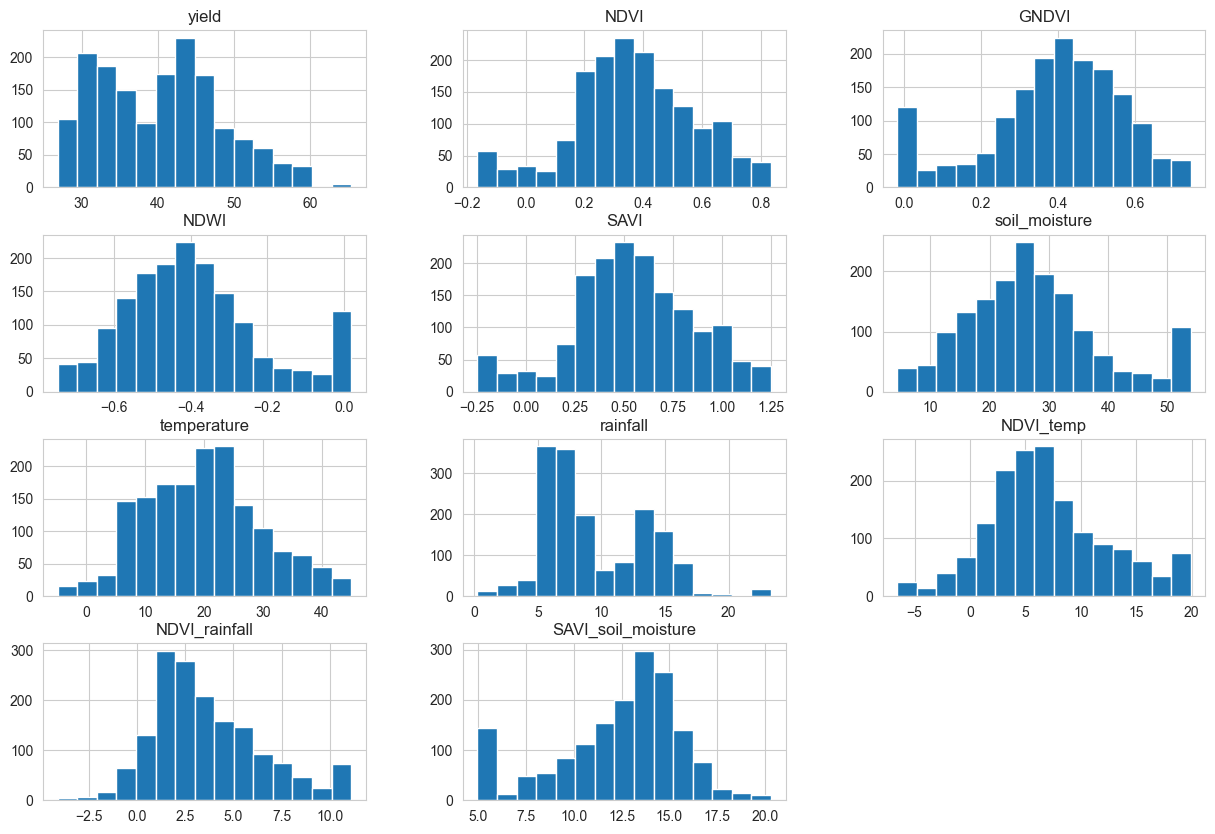

In [18]:
data[["yield", "NDVI", "GNDVI", "NDWI", "SAVI", "soil_moisture", "temperature", "rainfall","NDVI_temp","NDVI_rainfall","SAVI_soil_moisture"]].hist(bins=15, figsize=(15, 10))
plt.show()

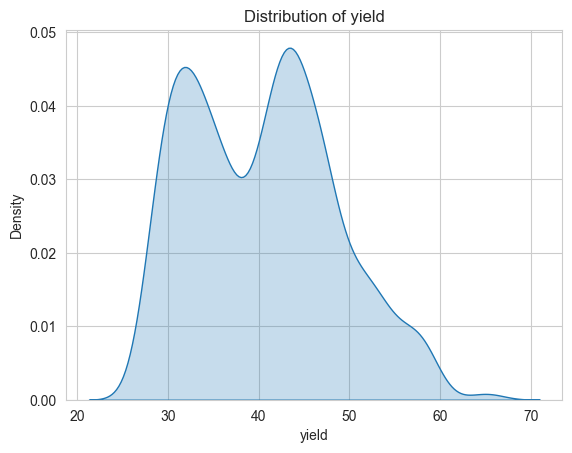

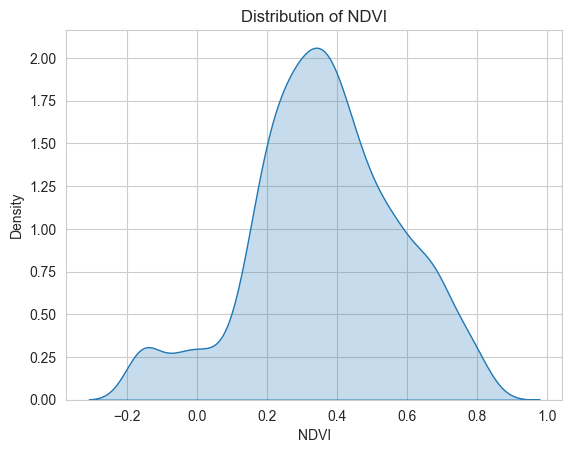

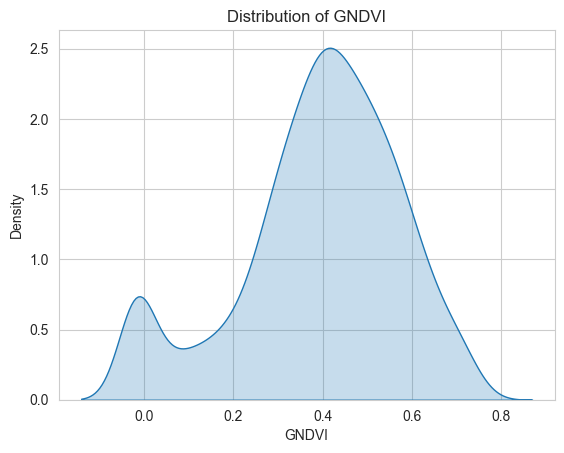

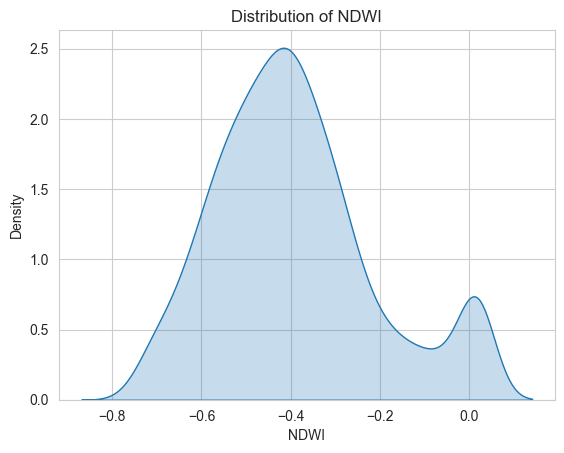

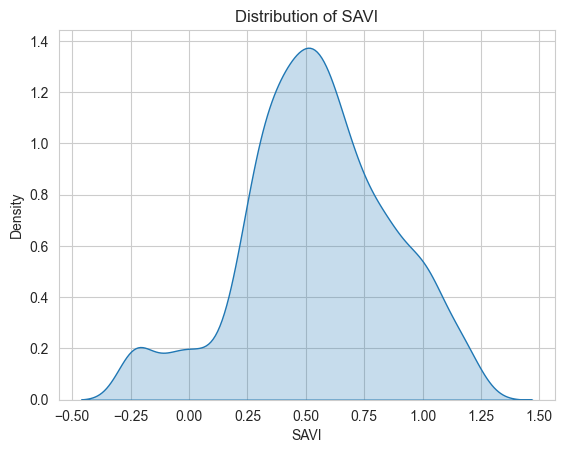

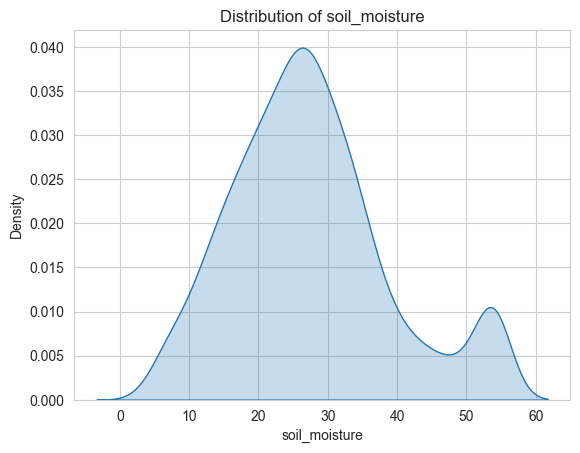

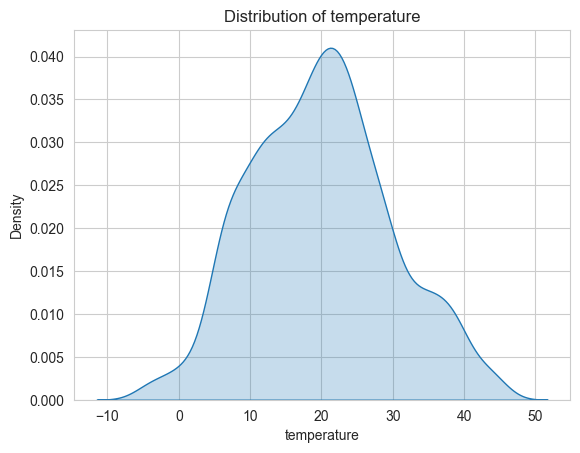

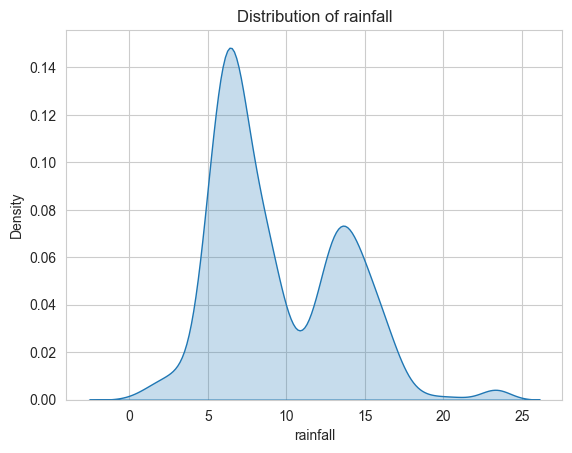

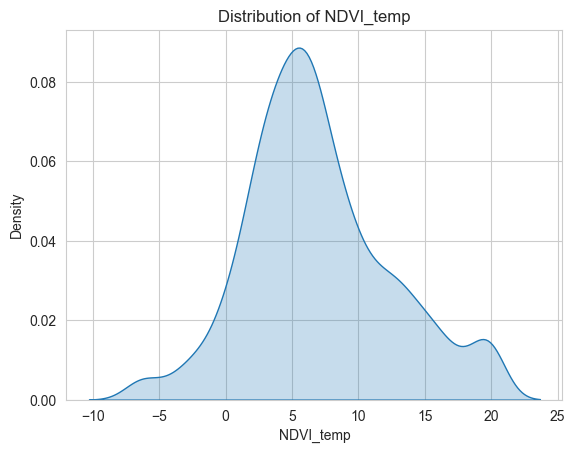

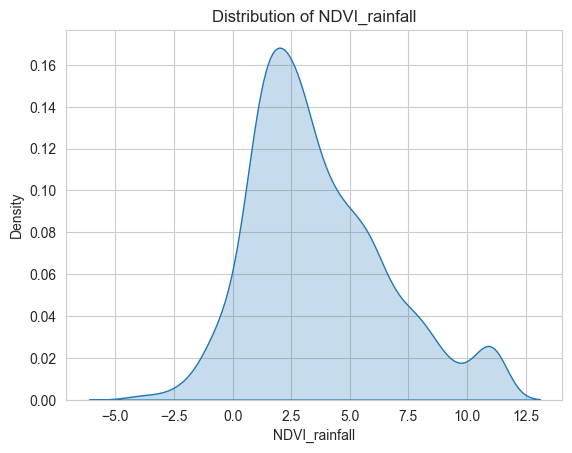

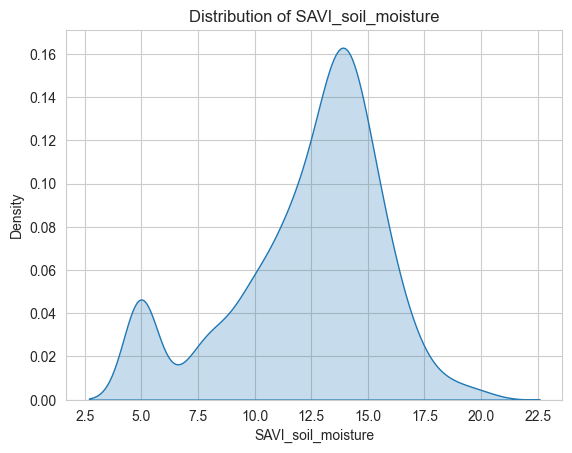

In [19]:
for col in["yield", "NDVI", "GNDVI", "NDWI", "SAVI", "soil_moisture", "temperature", "rainfall","NDVI_temp","NDVI_rainfall","SAVI_soil_moisture"]:
    sns.kdeplot(data[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [20]:
data.head()

,latitude,longitude,NDVI,GNDVI,NDWI,SAVI,soil_moisture,temperature,rainfall,crop_type,yield,NDVI_temp,NDVI_rainfall,SAVI_soil_moisture
0,22.625231,88.497925,0.060190,0.084801,-0.084801,0.090280,46.119353,9.884229,1.662354,Rice,40.218031,0.594931,0.100057,4.951343
1,22.625231,88.497925,0.213957,0.222009,-0.222009,0.320896,37.542525,13.967073,8.446302,Rice,30.870338,2.988355,1.807147,12.047228
2,22.625231,88.497925,0.403306,0.431204,-0.431204,0.604837,24.926279,13.590147,3.862833,Rice,45.330050,5.480993,1.557905,15.076337
3,22.625231,88.497925,0.418187,0.444132,-0.444132,0.627144,24.114157,12.343355,16.623542,Rice,49.711781,5.161825,6.951741,15.123042
4,22.625231,88.497925,0.375138,0.387985,-0.387985,0.562591,27.420927,11.007707,9.496210,Rice,34.542646,4.129405,3.562386,15.426760


In [21]:
data.shape

(1625, 14)

***Encoding Categorical Features***

In [22]:
label_encoder = LabelEncoder()
data['crop_type'] = label_encoder.fit_transform(data['crop_type'])

In [23]:
data.head()

,latitude,longitude,NDVI,GNDVI,NDWI,SAVI,soil_moisture,temperature,rainfall,crop_type,yield,NDVI_temp,NDVI_rainfall,SAVI_soil_moisture
0,22.625231,88.497925,0.060190,0.084801,-0.084801,0.090280,46.119353,9.884229,1.662354,18,40.218031,0.594931,0.100057,4.951343
1,22.625231,88.497925,0.213957,0.222009,-0.222009,0.320896,37.542525,13.967073,8.446302,18,30.870338,2.988355,1.807147,12.047228
2,22.625231,88.497925,0.403306,0.431204,-0.431204,0.604837,24.926279,13.590147,3.862833,18,45.330050,5.480993,1.557905,15.076337
3,22.625231,88.497925,0.418187,0.444132,-0.444132,0.627144,24.114157,12.343355,16.623542,18,49.711781,5.161825,6.951741,15.123042
4,22.625231,88.497925,0.375138,0.387985,-0.387985,0.562591,27.420927,11.007707,9.496210,18,34.542646,4.129405,3.562386,15.426760


***Scaling Numerical Values***

In [24]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[["latitude","longitude","NDVI", "GNDVI", "NDWI", "SAVI", "soil_moisture", "temperature", "rainfall","crop_type","NDVI_temp","NDVI_rainfall","SAVI_soil_moisture"]])
X_scaled = pd.DataFrame(scaled_features, columns=["latitude","longitude","NDVI", "GNDVI", "NDWI", "SAVI", "soil_moisture", "temperature", "rainfall","crop_type","NDVI_temp","NDVI_rainfall","SAVI_soil_moisture"])
y = data['yield']

In [34]:
yield_feature_names = X_scaled.columns.tolist()

***Splitting Dataset to Train and Test***

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

***Training Model***

In [27]:
model = RandomForestRegressor(random_state=42,n_estimators=500)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [28]:
y_pred = model.predict(X_test)

In [29]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.95


In [30]:
model.score(X_test,y_test)

0.9480446747777007

***Saving Models***

In [31]:
dump(model, "yield_prediction.joblib")

['yield_prediction.joblib']

In [32]:
dump(scaler, "yield_scaler.joblib")

['yield_scaler.joblib']

In [33]:
dump(yield_feature_names, "yield_feature_names.joblib")

['yield_feature_names.joblib']